In [4]:
from astropy.io import fits
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import glob

In [5]:
biases = sorted(glob.glob("data/ccd/*BIAS*"))
biases = list(map(fits.open, biases[:10]))

In [6]:
def gaussian(x, A, var, mu):
    return A * np.exp(-(x - mu)**2 / (2 * var))

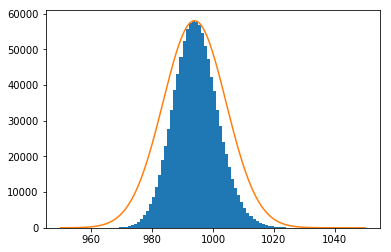

In [7]:
bias0 = biases[0][0]
bias0d = bias0.data.flatten()
bounds = 950, 1050
pmf, bins, _ = plt.hist(bias0d, bins=100, range=bounds);

avg0 = np.mean(bias0d)
mode0 = stats.mode(bias0d)[0][0]
med0 = np.median(bias0d)
std0 = np.std(bias0d)

x = np.linspace(*bounds, num=500)
gaussd = gaussian(x, max(pmf), std0**2, avg0)
plt.plot(x, gaussd);

In [21]:
nsd = np.abs((bias0d - avg0) / std0)
trimmed = bias0d[nsd < 3]

pct_bad = 100 * (1 - len(trimmed) / len(bias0d))
print("Q1 4.1")
print(f'The percent cut defined as 3 starndard deviations away is: {pct_bad:.3f}%')

Q1 4.1
The percent cut defined as 3 starndard deviations away is: 0.040%


In [9]:
elec_noise = bias0.header["EGAIN"] * std0
elec_noise

21.334021034554155

In [20]:
master = sum([bias[0].data.flatten() for bias in biases]) / len(biases)

avg = np.mean(master)
mode = stats.mode(master)[0][0]
med = np.median(master)
std = np.std(master)

print("Q2 4.1")
print("standard deviation is {}".format(std0))
print("master standard deviation is {}".format(std))
print("This is a factor of {}".format(std/std0))
print("This is not quite {}".format(1/np.sqrt(10)))

Q2 4.1
standard deviation is 10.35632089056027
master standard deviation is 5.381477261079577
This is a factor of 0.5196321471638412
This is not quite 0.31622776601683794


In [11]:
HotBias = list(fits.open("data/ccd/m13.00000031.BIAS.FIT"))
print(HotBias)

In [12]:
def stas(data):
    return np.mean(data), stats.mode(data)[0][0], np.median(data), np.std(data)

In [13]:
HotBias1 = HotBias[0].data.flatten()
Hotavg, Hotmode, Hotmedian, Hotstd = stas(HotBias1)

In [23]:
trimmed_hot = np.abs((HotBias1-Hotavg)/Hotstd)
HotTrim = HotBias1[trimmed_hot < 3]
pct_bad_hot = 100 * (1 - len(HotTrim) / len(HotBias1))
print(f'The percent cut defined as 3 standard deviations away is: {pct_bad_hot:.3f}%')   


The percent cut defined as 3 standard deviations away is: 0.052%
This is less than 0.04% 
